# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [2]:
# creating glob object to loop inside it and concatenate multiple .csv files in a void list as pandas df
files = glob.glob('states*.csv')
df_list = []
for items in files :
    df = pd.read_csv(items)
    df_list.append(df)

# Joining multiple dataframes into a bigger one and resetting index dropping old column
us_census = pd.concat(df_list)
us_census.reset_index(drop=True, inplace=True)
us_census = us_census.drop(columns='Unnamed: 0', axis = 1)


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [3]:

# removing %, $ and , to lately converting dtype object to numeric

us_census = us_census.replace("%|\$","", regex=True)
us_census['Income'] = us_census['Income'].str.replace(',','')

print(us_census.head())
print(us_census.dtypes)

            State  TotalPop Hispanic  White  Black Native Asian Pacific  \
0    Rhode Island   1053661    13.36  74.33   5.68   0.35  3.25    0.04   
1  South Carolina   4777576     5.06  62.89  28.75   0.29  1.25    0.05   
2    South Dakota    843190     3.24  82.50   1.42   9.42  1.02    0.04   
3       Tennessee   6499615     4.72  73.49  18.28   0.23  1.41    0.04   
4           Texas  26538614    38.05  44.69  11.65   0.26  3.67    0.07   

      Income            GenderPop  
0  59125.27       510388M_543273F  
1  46296.81     2322409M_2455167F  
2  51805.41       423477M_419713F  
3  47328.08     3167756M_3331859F  
4  55874.52   13171316M_13367298F  
State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object


6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [4]:
us_census['GenderPop'] = us_census['GenderPop'].str.split('_')
us_census['M'] = us_census['GenderPop'].str[0]
us_census['M'] = us_census['M'].str.replace('M','')
us_census['F'] = us_census['GenderPop'].str[1]
us_census['F'] = us_census['F'].str.replace('F','')



7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [5]:
columns = ['Hispanic','White','Black','Native','Asian','Pacific','Income','M','F']
us_census[columns] = us_census[columns].apply(pd.to_numeric, axis=1)
us_census = us_census.drop(['GenderPop'], axis = 1)

8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

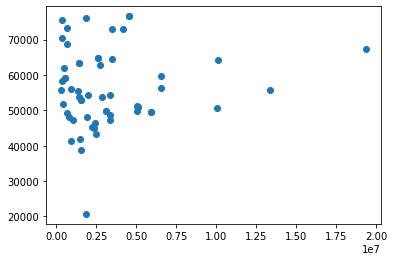

In [6]:
plt.scatter(us_census['F'],us_census['Income'])
plt.show()


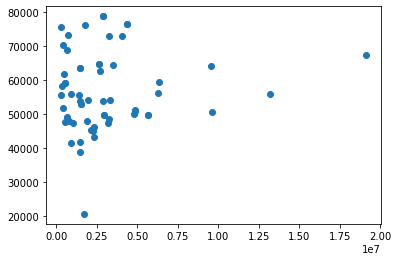

In [7]:
plt.scatter(us_census['M'],us_census['Income'])
plt.show()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [8]:
us_census['F'] = us_census['F'].fillna(us_census['TotalPop']- us_census['M'])

10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [9]:
us_census.duplicated()
us_census = us_census.drop_duplicates()

11. Drop those duplicates using the `.drop_duplicates()` function.

12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

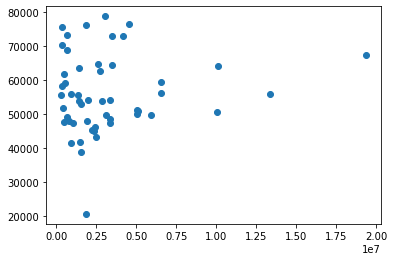

In [10]:
plt.scatter(us_census['F'],us_census['Income'])
plt.show()

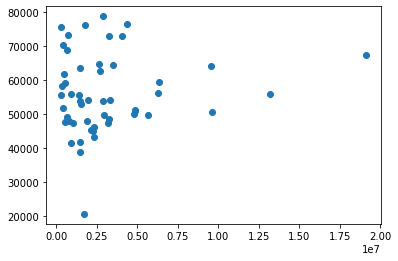

In [11]:
plt.scatter(us_census['M'],us_census['Income'])
plt.show()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

            State  TotalPop  Hispanic  White  Black  Native  Asian  Pacific  \
0    Rhode Island   1053661     13.36  74.33   5.68    0.35   3.25     0.04   
1  South Carolina   4777576      5.06  62.89  28.75    0.29   1.25     0.05   
2    South Dakota    843190      3.24  82.50   1.42    9.42   1.02     0.04   
3       Tennessee   6499615      4.72  73.49  18.28    0.23   1.41     0.04   
4           Texas  26538614     38.05  44.69  11.65    0.26   3.67     0.07   

     Income           M           F  
0  59125.27    510388.0    543273.0  
1  46296.81   2322409.0   2455167.0  
2  51805.41    423477.0    419713.0  
3  47328.08   3167756.0   3331859.0  
4  55874.52  13171316.0  13367298.0  


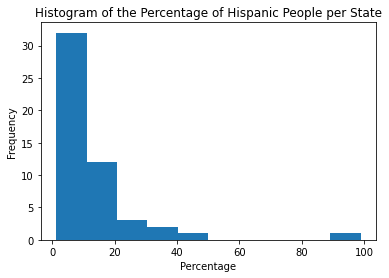

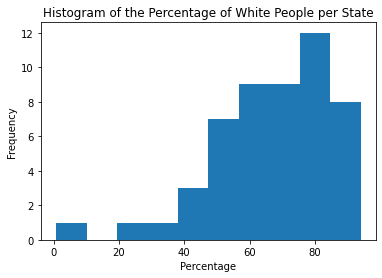

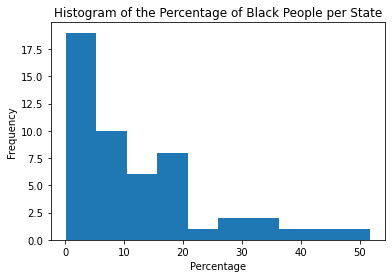

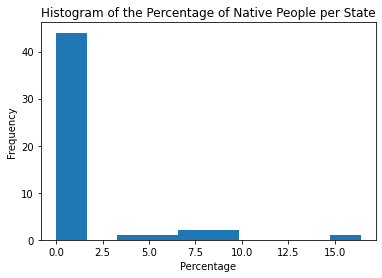

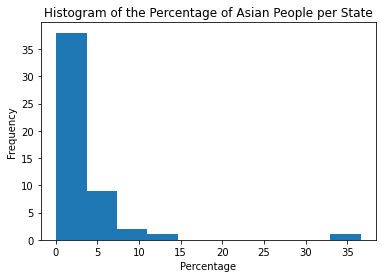

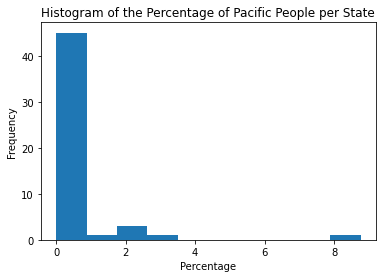

<Figure size 432x288 with 0 Axes>

In [12]:

pacific_mean = round(us_census['Pacific'].mean(), 2)
us_census['Pacific'] = us_census['Pacific'].fillna(100 - us_census['Hispanic'] - us_census['White'] - us_census['Black'] - us_census['Native'] - us_census['Asian'])
print(us_census.head())


for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.hist(us_census[race])
    plt.title("Histogram of the Percentage of {} People per State".format(race))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()

14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [13]:
# Top 5 state for each race

races = ['Hispanic', 'White', 'Black', 'Native', 'Asian','Pacific']
for race in races:
        print("Top 5 states for " + str(race) + ' race')
        print(us_census[['State', 'TotalPop', race]].sort_values(by = race, ascending = False).nlargest(5, race))
        print('\n')
        

Top 5 states for Hispanic race
          State  TotalPop  Hispanic
28  Puerto Rico   3583073     98.89
31   New Mexico   2084117     45.28
4         Texas  26538614     38.05
58   California  38421464     37.29
56      Arizona   6641928     29.57


Top 5 states for White race
            State  TotalPop  White
7         Vermont    626604  93.98
46          Maine   1329100  93.71
10  West Virginia   1851420  92.18
22  New Hampshire   1324201  91.32
41           Iowa   3093526  87.72


Top 5 states for Black race
                   State  TotalPop  Black
51  District of Columbia    647484  51.78
16           Mississippi   2988081  41.49
45             Louisiana   4625253  36.33
36               Georgia  10006693  32.09
54               Alabama   4830620  31.25


Top 5 states for Native race
           State  TotalPop  Native
55        Alaska    733375   16.39
2   South Dakota    843190    9.42
31    New Mexico   2084117    9.25
19       Montana   1014699    7.06
25      Oklahoma   384973

In [94]:

# race percent bar plot for each state

states = us_census.State.values

columns = ['State','Hispanic', 'White', 'Black', 'Native', 'Asian','Pacific']
us_census_races = us_census[columns].set_index('State')


print(us_census_races.head())

                Hispanic  White  Black  Native  Asian  Pacific
State                                                         
Rhode Island       13.36  74.33   5.68    0.35   3.25     0.04
South Carolina      5.06  62.89  28.75    0.29   1.25     0.05
South Dakota        3.24  82.50   1.42    9.42   1.02     0.04
Tennessee           4.72  73.49  18.28    0.23   1.41     0.04
Texas              38.05  44.69  11.65    0.26   3.67     0.07


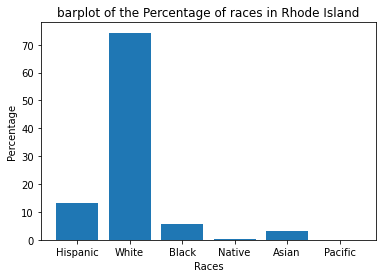

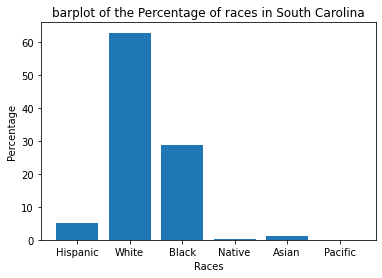

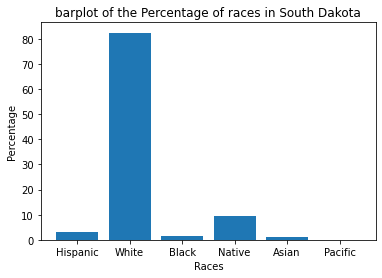

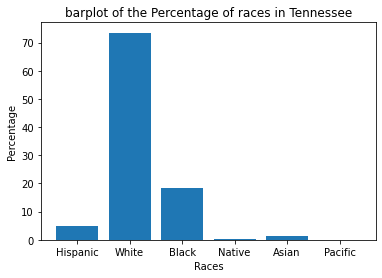

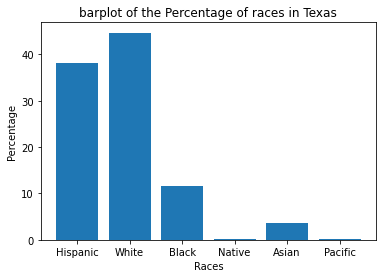

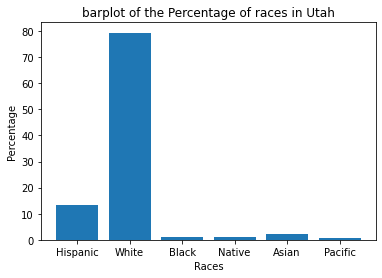

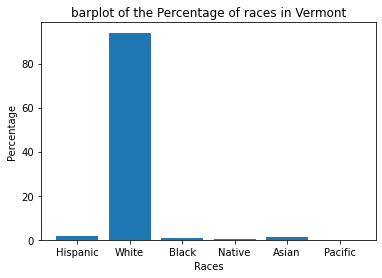

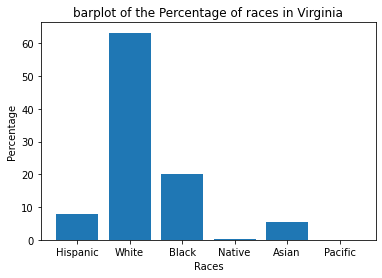

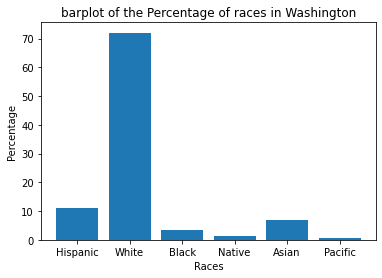

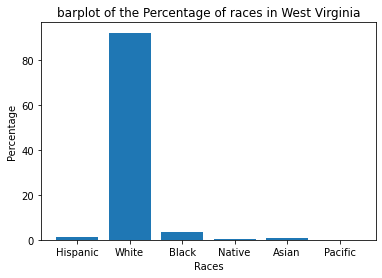

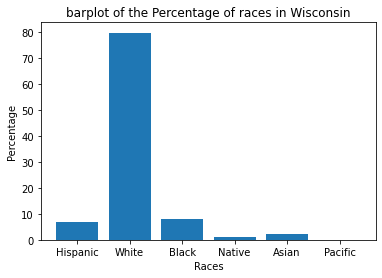

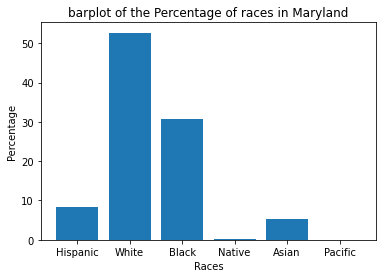

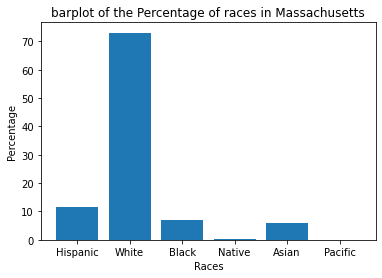

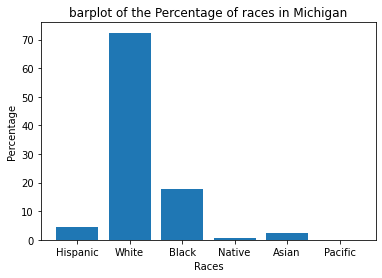

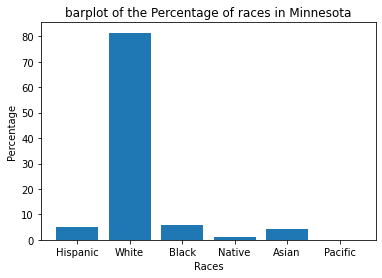

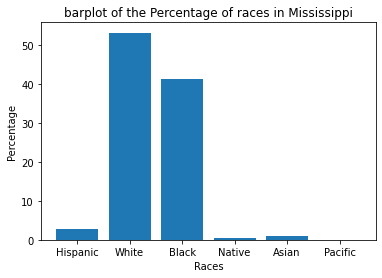

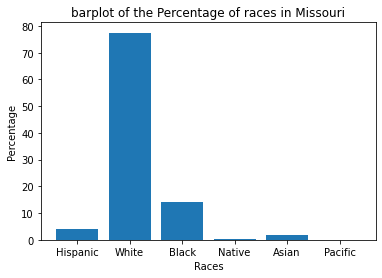

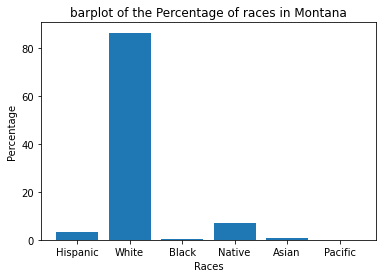

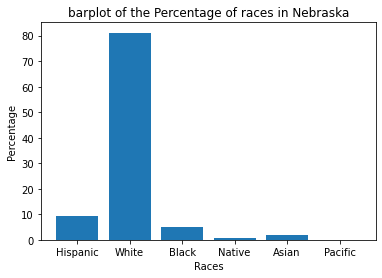

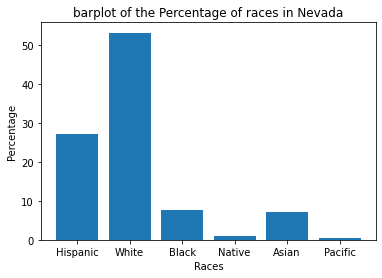

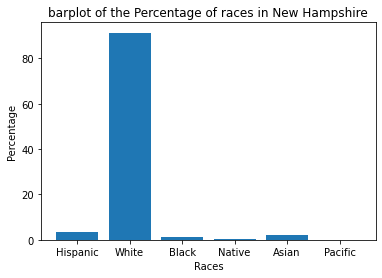

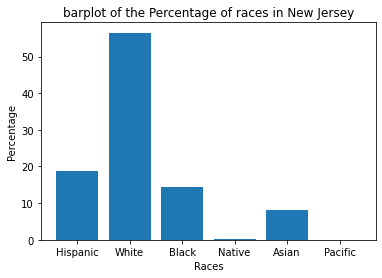

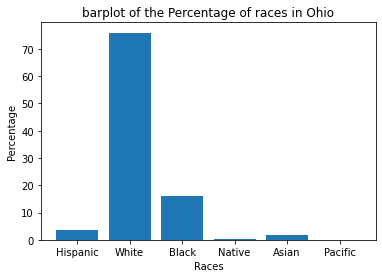

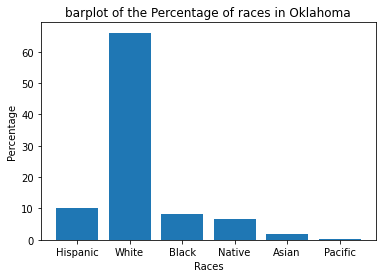

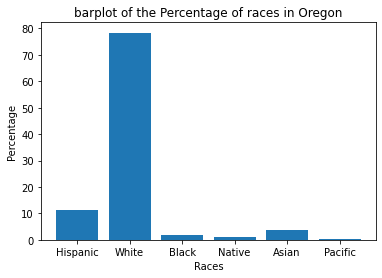

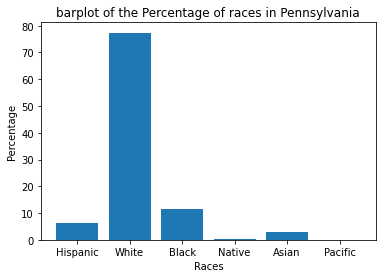

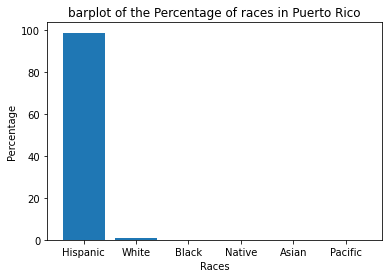

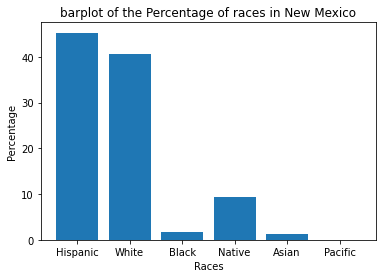

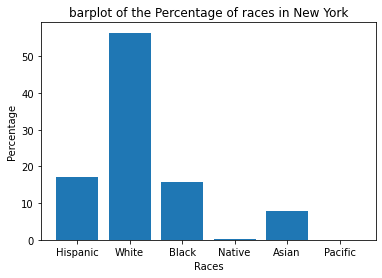

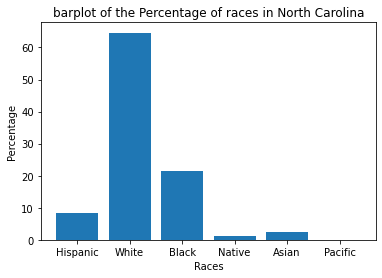

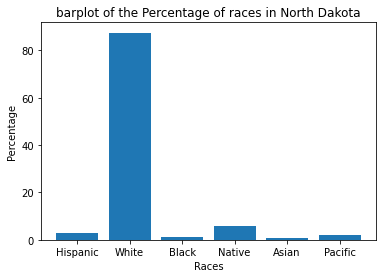

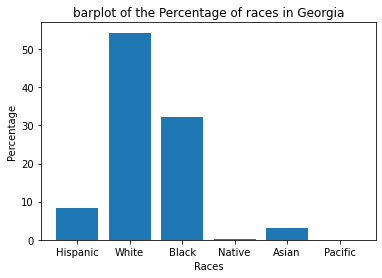

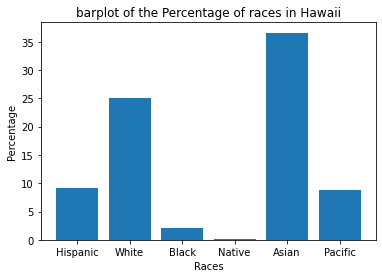

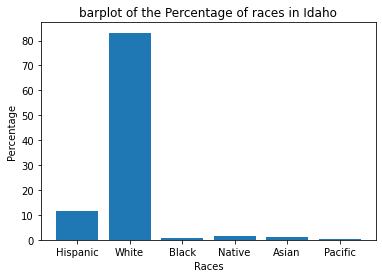

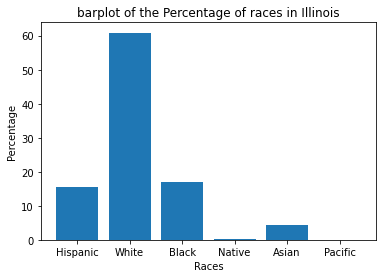

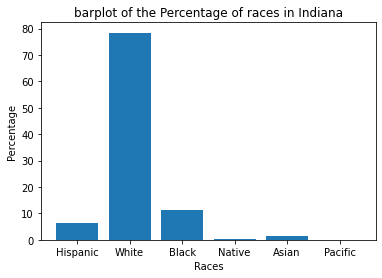

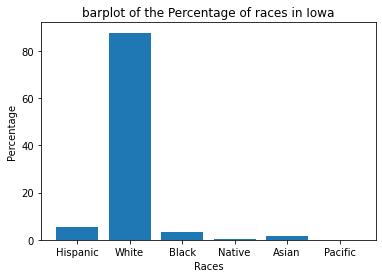

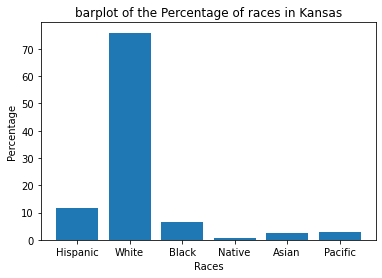

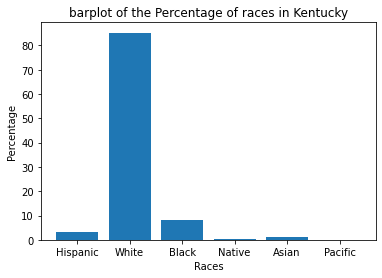

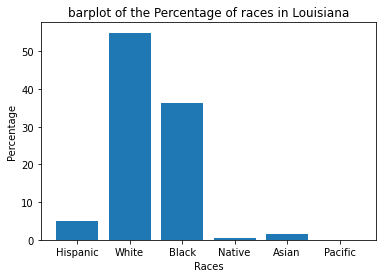

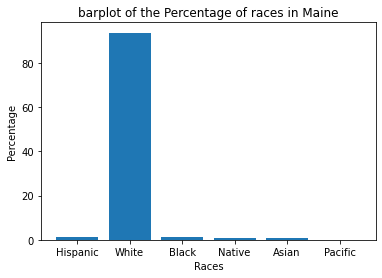

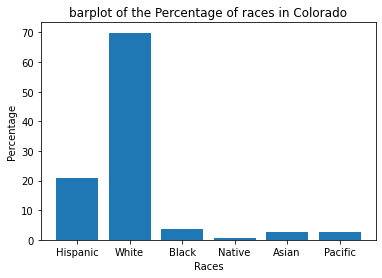

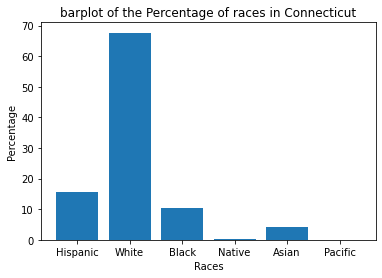

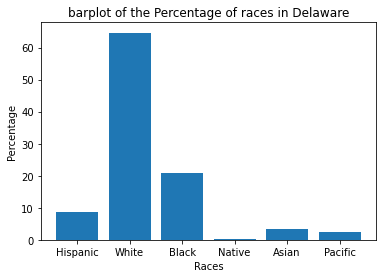

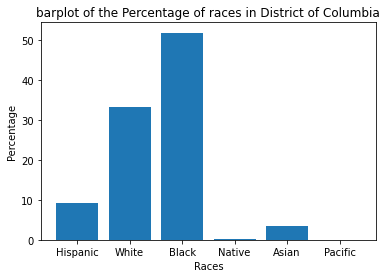

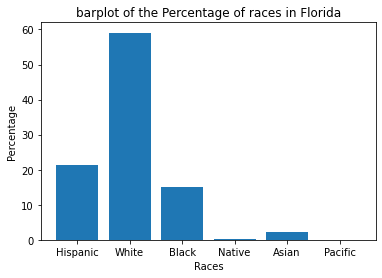

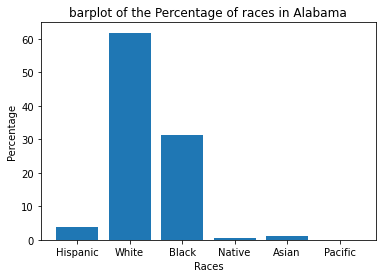

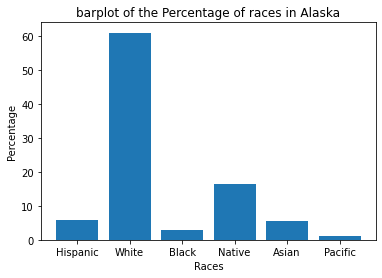

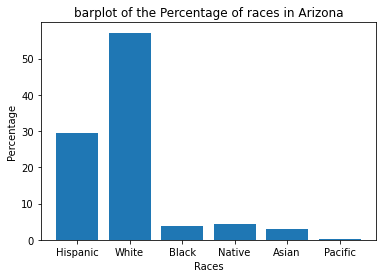

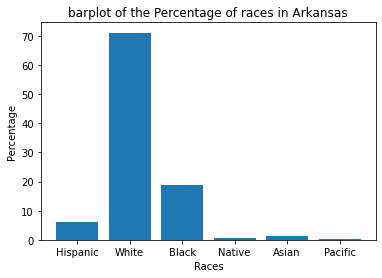

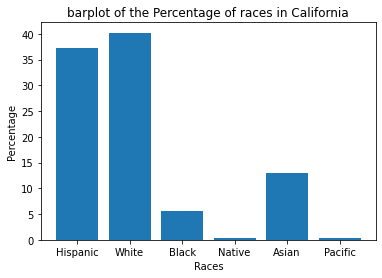

<Figure size 432x288 with 0 Axes>

In [95]:

for state in states:
    data = us_census_races.loc[state].tolist()
    plotcol = ['Hispanic', 'White', 'Black', 'Native', 'Asian','Pacific']
    plt.bar(x = plotcol , height = data)
    plt.title("barplot of the Percentage of races in {}".format(state))
    plt.xlabel("Races")
    plt.ylabel("Percentage")
    plt.show()
    plt.clf()

## Get Creative

15. Phew. You've definitely impressed your boss on your first day of work.

    But is there a way you really convey the power of pandas and Python over the drudgery of `csv` and Excel?
    
    Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you've been searching for.